In [343]:
import sys
import numpy as np
from matplotlib import colors
import matplotlib.pyplot as plt
import cv2 as cv

sys.path.append('..')

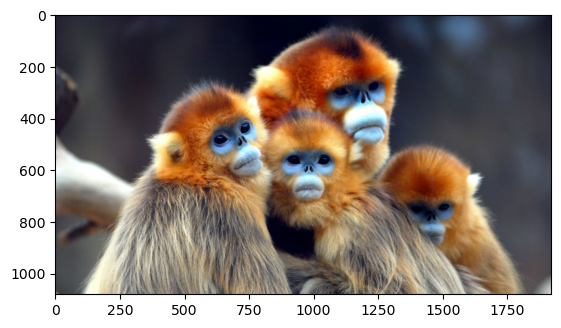

In [344]:
image = cv.imread('../images/lr5.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

plt.imshow(image_rgb)

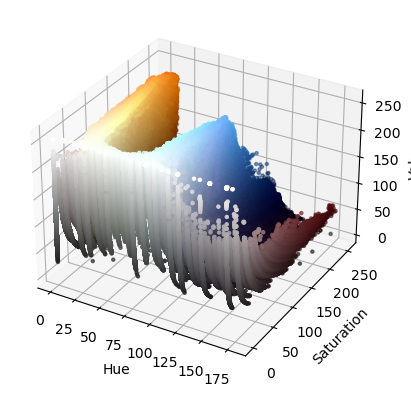

In [345]:
pixel_colors = image_rgb.reshape((np.shape(image_rgb)[0]*np.shape(image_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

h, s, v = cv.split(image_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [346]:
lower_blue = np.array([105,150,50])
upper_blue = np.array([125,250,100])

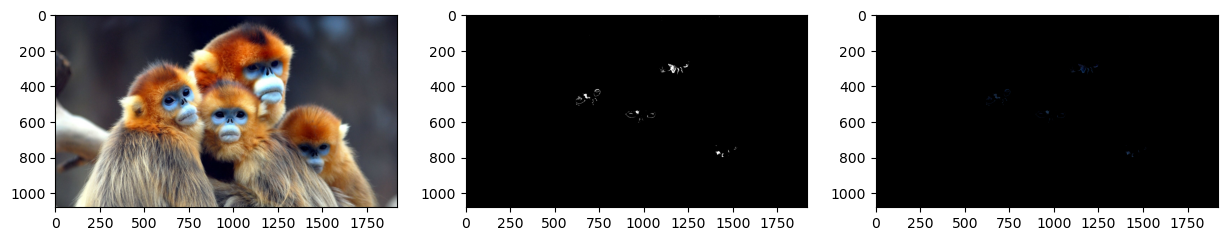

In [347]:
mask = cv.inRange(image_hsv, lower_blue, upper_blue)
result = cv.bitwise_and(image_rgb, image_rgb, mask=mask)

plt.figure(figsize=(15,20))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(result)
plt.show()

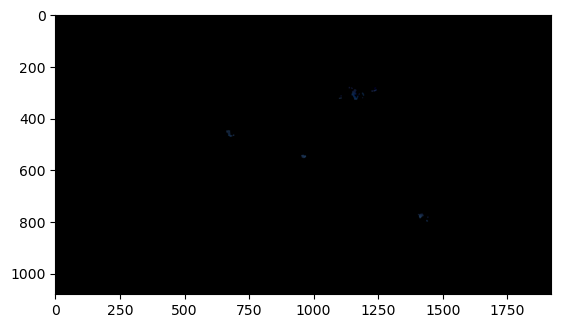

In [348]:
kernel = np.ones((4, 4), np.uint8)
opening = cv.morphologyEx(result, cv.MORPH_OPEN, kernel, iterations=1)
plt.imshow(opening, cmap='gray')

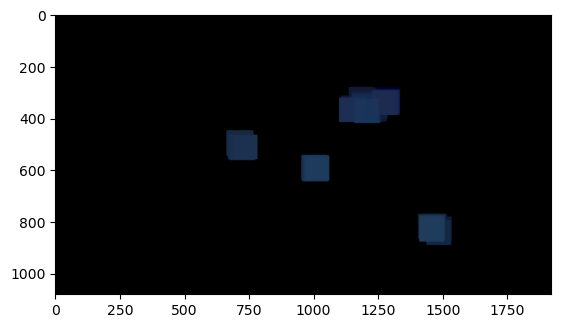

In [355]:
kernel = np.ones((2, 2), np.uint8)
dilation = cv.dilate(opening, kernel, iterations=90)
plt.imshow(dilation,cmap='gray')

In [350]:
arr = dilation[:, :, 1] + dilation[:, :, 2] + dilation[:, :, 0]
fc = cv.findContours(arr, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
counters = fc[0]

In [351]:
counter = 0
for contour in counters:
    counter += 1
print(counter)

4


In [352]:
closed_contours = []
open_contours = []
for i in counters:
    if cv.contourArea(i) > cv.arcLength(i, True):
        closed_contours.append(i)
    else:
        open_contours.append(i)

len(closed_contours)

4